In [1]:
from preprocessor import Preprocessor
import pandas as pd
import scorecardpy as sc
import matplotlib.pyplot as plt
from df_template import render_mpl_table
import numpy as np

In [2]:
df = pd.read_excel("Project 2 - Data.xls")
preprocessor=Preprocessor(df)
preprocessor.remove_duplicates()
preprocessor.adjust_excel()

df.columns #columns
len(df) #number of records
defaults=df['DEFAULT_FLAG'].to_numpy()
np.sum(defaults) #number of defaults
558/5801


0.0961903120151698

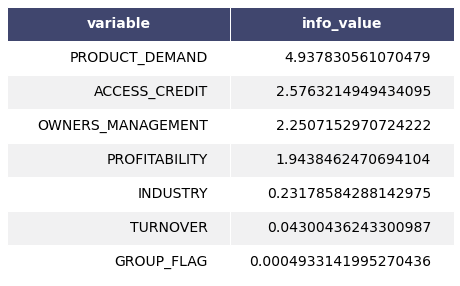

In [3]:
iv_table = sc.iv(df, 'DEFAULT_FLAG')
fig, ax = render_mpl_table(iv_table, col_width= 4.0)
fig.savefig("iv_table.png")

In [4]:
iv_table['variable']

1       PRODUCT_DEMAND
4        ACCESS_CREDIT
6    OWNERS_MANAGEMENT
0        PROFITABILITY
3             INDUSTRY
5             TURNOVER
2           GROUP_FLAG
Name: variable, dtype: object

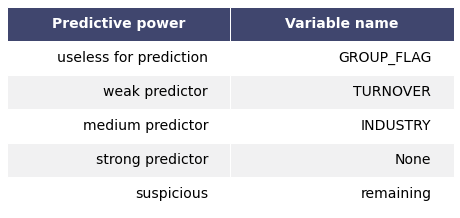

In [5]:
data = [['useless for prediction', 'GROUP_FLAG'], ['weak predictor', 'TURNOVER'], ['medium predictor', 'INDUSTRY'], ['strong predictor','None'],['suspicious','remaining']]
predictor_table = pd.DataFrame(data, columns = ['Predictive power', 'Variable name'])
fig, ax = render_mpl_table(predictor_table, col_width= 4.0)
fig.savefig("predictor_table.png")

In [6]:
from logistic_regression import score as log_regr_score
from implied_model import score as implied_score
from linear_regression import score as linear_score
from probit_regression import score as probit_score

values=[]
values.append(log_regr_score)
values.append(probit_score)
values.append(linear_score)
values.append(implied_score)

[INFO] filtering variables ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
Index(['PRODUCT_DEMAND', 'OWNERS_MANAGEMENT', 'ACCESS_CREDIT', 'PROFITABILITY',
       'SHORT_TERM_LIQUIDITY', 'MEDIUM_TERM_LIQUIDITY', 'DEFAULT_FLAG'],
      dtype='object')
true negative: 0
negative 0
recall: 1.0
precision: 0.07415688466554872
true negative: 0
negative 0
true negative: 0
negative 0
F1 score: 0.13807458803122288
true negative: 0
accuracy: 0.07415688466554872
Score: 0.07415688466554872
[INFO] filtering variables ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[ 4.17574381e-01  4.53790280e-02  2.12166199e-04 ...  6.66143131e-02
  3.05194120e-02 -5.13773844e-02]
Score: 0.3837675400567301
[INFO] filtering variables ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
Optimization terminated successfully.
         C

[0.9404096834264432, 0.904096834264432, 0.3837675400567301, 0.07415688466554872]


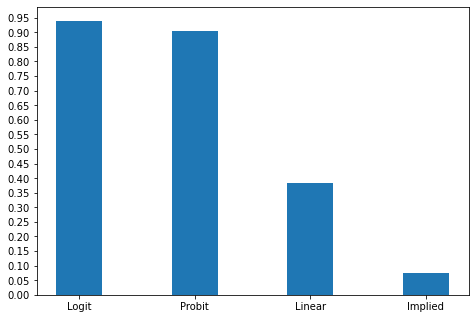

In [7]:
print(values)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.yticks(np.arange(0,1,0.05))

models = ['Logit', 'Probit', 'Linear','Implied']
scores=values
ax.bar(models,scores,width=0.4)

plt.show()
